## **supervised machine learning**
**Supervised Machine Learning** involves helping an algorithm, called a **model**, learn to make **predictions**, based on data it has been "trained on".
- Making a prediction entails providing an output, called a **prediction**, based on various inputs called **features**.
- The correct predicton is called the **target**, since the purpose and goal of the model is to hit the target with a correct prediction.
- During training the "correct answer" is called the **label**, since it is provided information.
- Training a model entails providing the model with **training data**, that is "inputs paired with the correct label".
- The "questions" are input variables, known as **features**
- During training the model is provided the "correct answer" (target output) that goes with each input feature.

**training scenario**
  - if a model is being trained to predict car prices based on certain known features of the car, the **features** (fuel efficiency, engine size, horsepower, etc.) would be a 2D array of numeric values, one array per car, and the corresponding **label** (correct answers) would be the **price** of the car. The model would be given a lot of feature sets with correct answers in the hopes that it could learn to then predict prices based on just features (without being given the answers).

  - if a model is being trained to recognize pictures of dogs vs. cats, the **features** would be images of dogs or cats, and the **labels** (correct answers) would be **cat** or **dog**. If the model "sees" enough pictures of dogs vs. cats, it can eventually recognize enough unique features to distinguish between the two.

**the model only "thinks" in numbers**.
- All inputs to a model for machine leaning training need to be numbers. So a "color photo" of a cat would actually be an array of pixel data, as R,G,B values.
- All outputs (predictions) made by a model are numbers, as well.  Again, in the case of  cat-vs.dog, the model's predictions would be one of two numbers, such as 1 for "cat" and 2 for "dog".

**testing data**.  
- Some of the data needs to be withheld from the model during training, so that the model can be tested later. This "withheld" data is known as **testing data**
- **train_test_split()** is a scikit learn method for taking a dataset and dividing it up into training and testing sets, each with two parts: "features" and "labels".
- **train_test_split()
involves splitting a dataset into **training** and testing sets
- 80% of the data is (typically) used during training
- 20% of the data is (typically) reserved for testing


In [182]:
# [pclass, gender, age]
# pclass: 1="first", 2="second", 3="third"
# gender: 0="female", 1="male"
# first class females had a VERY high (97%) survival rate
# third class males  had a VERY low (12%) survival rate
# everyone else was somewhere in between
# 2nd class females had higher survival than 2nd class males
# 1st class females had higher survival than 2nd class females
# in ML, features are the vectors of data "fed" to model for training
# [survived, pclass, gender, age]
# 1 (survived) and 0 (didn't survive)
# [survived, pclass, gender, age]
passengers_data = [
    [1,1,0,12],
    [1,1,1,42],
    [1,2,0,32],
    [0,2,1,22],
    [0,3,0,25],
    [0,3,1,32],
]
# in supervised learning, features must be accompanied by "answers",
# the answer is called the target; in case of titanic survival,
# tgt is 1 (survived) and 0 (didn't survive)
# the dataset is divided into TWO pieces:
# training/testing inputs and answer/target outputs:
# by convention the inputs are called X
# and the outputs are called y
X = [
    [1,0,12],
    [1,1,42],
    [2,0,32],
    [2,1,22],
    [3,0,25],
    [3,1,32],
]
y = [1,1,1,0,0,0]
# in ML training the model does NOT get 100% of all the data with all the answers --- nooo.. it gets around 80%
# so the data set as X, y gets split into TWO subsets: X_train, X_test
# and y_train, y_test
# the training sets are what the model receives as trainging data
# the subsets are made from randomly chosen 80-20 split
X_train = [
    [1,0,12],
    [2,0,32],
    [2,1,22],
    [3,1,32],
]
X_test = [
    [1,1,42],
    [3,0,25],
]
# the training data X gets paired w answers:
y_train = [1,1,0,0]
y_test = [1,0]
y_pred = [1,1] # 50% accuracy score

**Predicting Car Sales using LinearRegression Machine Learning model**
- working with **SciKit Learn (sklearn)** machine learning libaries
- **train_test_split()** method divides data into training and testing
- **df.corr(numeric=True)** returns a new df of numeric values
  - new df shape has equal number of rows and cols
  - values are correlations between row-col pairings
  - self-pairs have a correlation value of 1
- **sns.heatmap()** is a visualization of a correlation matrix as color-coded boxes
- **sns.pairplot(df)** is a visualization of a correlation matrix as bar charts comparing columns

In [183]:
# install seaborn if necessary
# %pip install seaborn

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import pprint as pp
import seaborn as sns

In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
# set the base path for loading assets (images)
base_path = "/content/drive/MyDrive/____Intro-Python-Machine-Learning-Dec-2025/"

In [187]:
# install sklearn (Sci-Kit Learn)
# %pip install scikit-learn

In [188]:
# import machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# import StandardScaler so we can standardize all the data (make all the mean values 0 and all other values as standard deviation from the mean
# result is all values floats, with 95% of them in the -2 to +2 range
from sklearn.preprocessing import StandardScaler

In [189]:
# Load up a different dataset with more rows, so better for ML training
# the one we want is conveniently built in to sklearn
from sklearn.datasets import fetch_california_housing

In [190]:
# load the California housing data into dataframe
ca_df = fetch_california_housing(as_frame=True).frame

In [191]:
# get shape of housing_df and print first 5 rows:
print(ca_df.shape) # (20640, 9)
ca_df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [192]:
# get the cols into a list
cols_list = list(ca_df.columns)
pp.pprint(cols_list)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']


In [193]:
# check for missing data
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Correlation Matrix** is a **DataFrame** made from numeric variables, where every value is compared to every other value.
- The dataframe contains all columns with one row per column.
- **index** (row names) equal column names -- not integers
- values are floats, ranging from **-1** to **1**.
- **positive** number means positive correlation
- **1.0** (the max) indicates a "self-comparison"
- **negative** number means negative correlation
- **California housing** has 9 columns, so its correlation matrix is a 9x9 grid.
- 1.0000 "self-comparisons" run diagonally, from upper left

**df.corr(numeric_only=True)** method called on a dataframe returns a correlation matrix, also as a df



In [194]:
# make a correlation matrix dataframe from the 9-column df:
corr_df = ca_df.corr()

In [195]:
# Output the shape and datatype, along with the matrix df itself:
print(corr_df.shape) # (9,9)
corr_df

(9, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


A **Heat Map** is a a color-coded correlation matrix.
- **seaborn** is the package of choice for making heat maps
- positive correlations are shades of orange and tan
- the max 1 (self-correlation) is a beige color
- negative correlations are shades of red and purple
- high negative correlations tend toward black

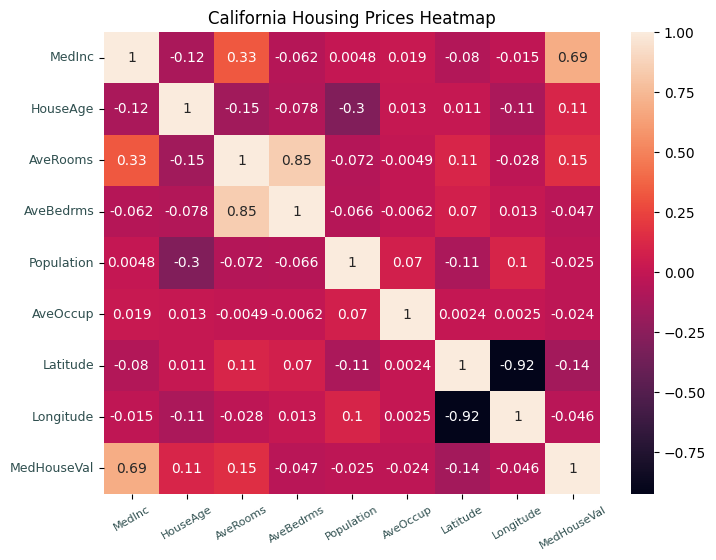

In [196]:
# Make a seaborn heat map from the 9x9 df correlation matrix
# a heatmap uses colors to show positive / negative correlation between pairs
# the maximum positive correlation is 1
# the maximum negative correlation is -1
# a value near 0 shows little to no correlation
# a "self-pair" with a correlation of 1 is by default beige
plt.figure(figsize=(8,6))
# a perfect negative corrleation of -1 is black
# at around -0.7 the negative correlation color is already black
sns.heatmap(corr_df, annot=True, annot_kws={'size':10})
plt.title("California Housing Prices Heatmap")
plt.xticks(fontsize=8, rotation=30, color='darkslategray')
plt.yticks(fontsize=9, color='darkslategray')
# save the heatmap as a .png
# "/california-housing-prices-heatmap.png"
plt.show()

A **Pair Plot** is a a correlation matrix of scatter plots
- **seaborn** is the package of choice for making pair plots
- strong positive correlations show as dots trending upward from left the right
- strong negative correlations show as dots trending downward from left to right
- self-correlations are **histograms**, which show data in frequency distribution **bins** (bars)

In [197]:
# make a df of just 5 selected columns of features, using ML naming convention
# 'MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude', 'MedHouseVal'
X = ca_df.loc[:,['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude']]

In [198]:
print(X.shape) # (20640, 5)
X.head()

(20640, 5)


,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,8.3252,41.0,6.984127,37.88,-122.23
1,8.3014,21.0,6.238137,37.86,-122.22
2,7.2574,52.0,8.288136,37.85,-122.24
3,5.6431,52.0,5.817352,37.85,-122.25
4,3.8462,52.0,6.281853,37.85,-122.25


In [199]:
# make the companion vector of "target" values (avg house value to predict)
# "little y" is set equal to the column we want to predict (y is a series)
y = ca_df["MedHouseVal"]

In [200]:
print(y.shape, type(y))
print(y[:5])

(20640,) <class 'pandas.core.series.Series'>
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [201]:
# make a correlation matrix from X, the 5-col df:
X_corr = X.corr()

In [202]:
print(X_corr.shape) # (5,5)
X_corr

(5, 5)


,MedInc,HouseAge,AveRooms,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.106389,-0.027540
Latitude,-0.079809,0.011173,0.106389,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,-0.924664,1.000000


In [203]:
six_col_df = ca_df.loc[:,['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude','MedHouseVal']]

In [204]:
print(six_col_df.shape)
six_col_df.head()

(20640, 6)


,MedInc,HouseAge,AveRooms,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,37.85,-122.25,3.422


<Figure size 600x600 with 0 Axes>

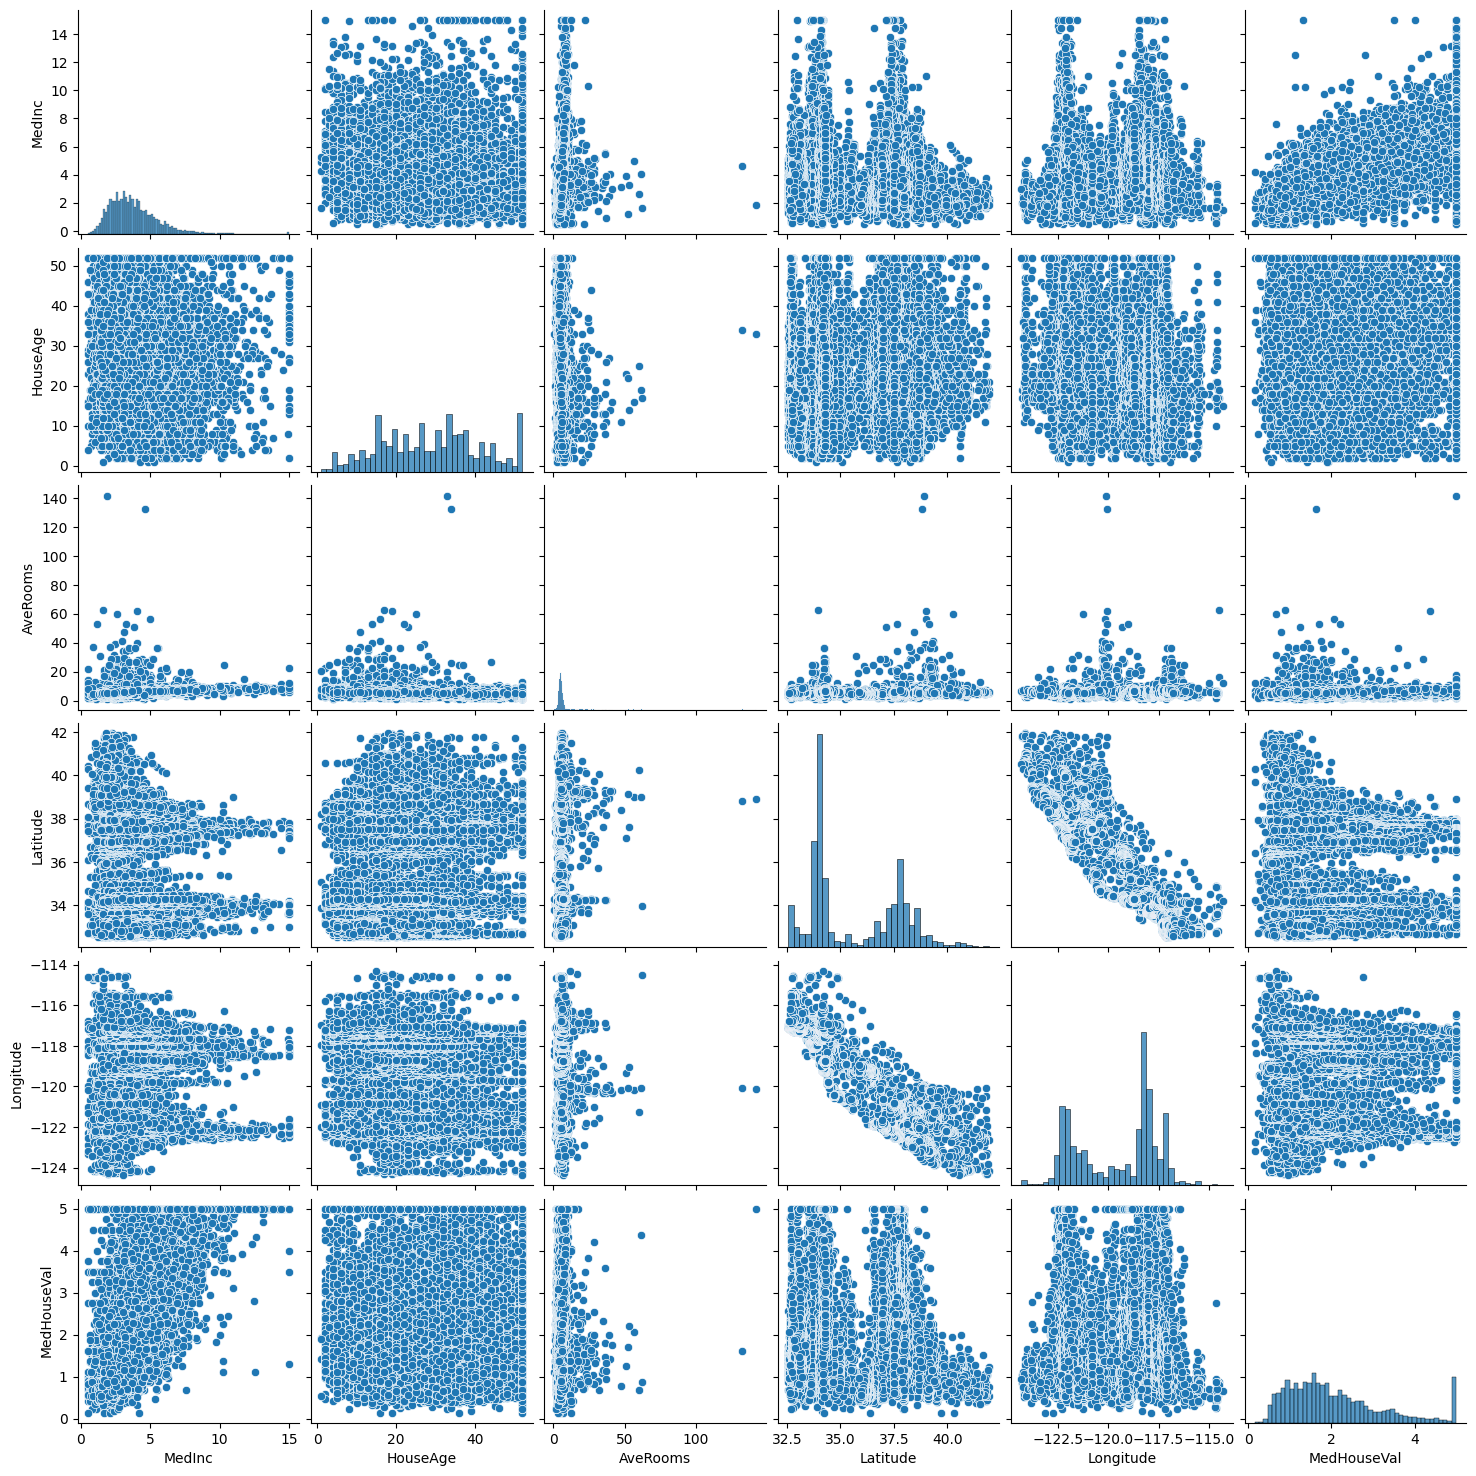

In [205]:
# make a seaborn pairplot
plt.figure(figsize=(6,6))
sns.pairplot(six_col_df)
plt.show()

In [206]:
# load mpg dataset to get better correlation scatterplots
mpg_df = sns.load_dataset("mpg")
print(mpg_df.shape) # (398, 9)
mpg_df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [207]:
# check how many unique values are in origin col:
unique_countries_list = list(mpg_df['origin'].unique())
pp.pprint(unique_countries_list) # ['usa', 'japan', 'europe']

['usa', 'japan', 'europe']


In [208]:
# challenge: using this mpg_df, make the following:
# - X (a df of usable cols for predicting: no string values)
# using iloc get all rows and all BUT last 2 cols (strings)
X = mpg_df.iloc[:,:-2]
print(X.shape)
X.head()

(398, 7)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [209]:
# - y (the col w the value you wish to predict, in this case, "mpg")
# make a correlation matrix and heatmap to help choose cols for X
# you want to discard as noise very low correlation values (near 0.0)
# however, this dataset probably has mostly if not all high-signal cols
# make a pairplot for this too

In [210]:
#  from X, make corr df of shape (7,7)
mpg_corr = X.corr()
print(mpg_corr.shape)
mpg_corr

(7, 7)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


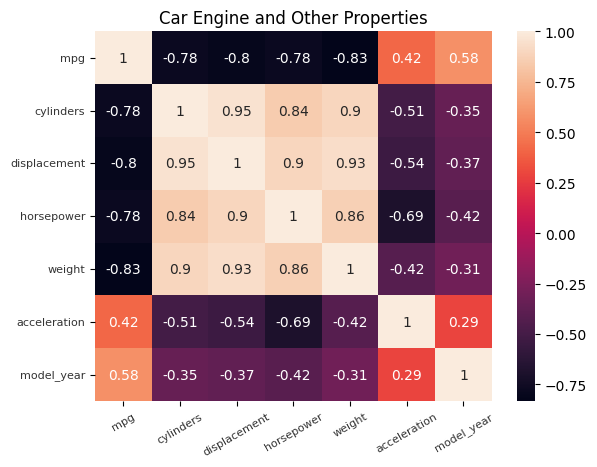

In [211]:
sns.heatmap(mpg_corr, annot=True, annot_kws={'size':10})
plt.title("Car Engine and Other Properties")
plt.xticks(rotation=30,fontsize=8, color='#333')
plt.yticks(fontsize=8, color='#333')
plt.show()

In [212]:
# throw out the 2 cols with lowest correlation to "mpg"
X.drop(columns=["acceleration","model_year"], inplace=True)

In [213]:
print(X.shape)
X.head()

(398, 5)


,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449


In [214]:
# horsepower is missing 6 rows, which is preventing regression line from being calculated and drawn, so get rid of those 6 rows:
X_clean = X.dropna(subset=["horsepower"])

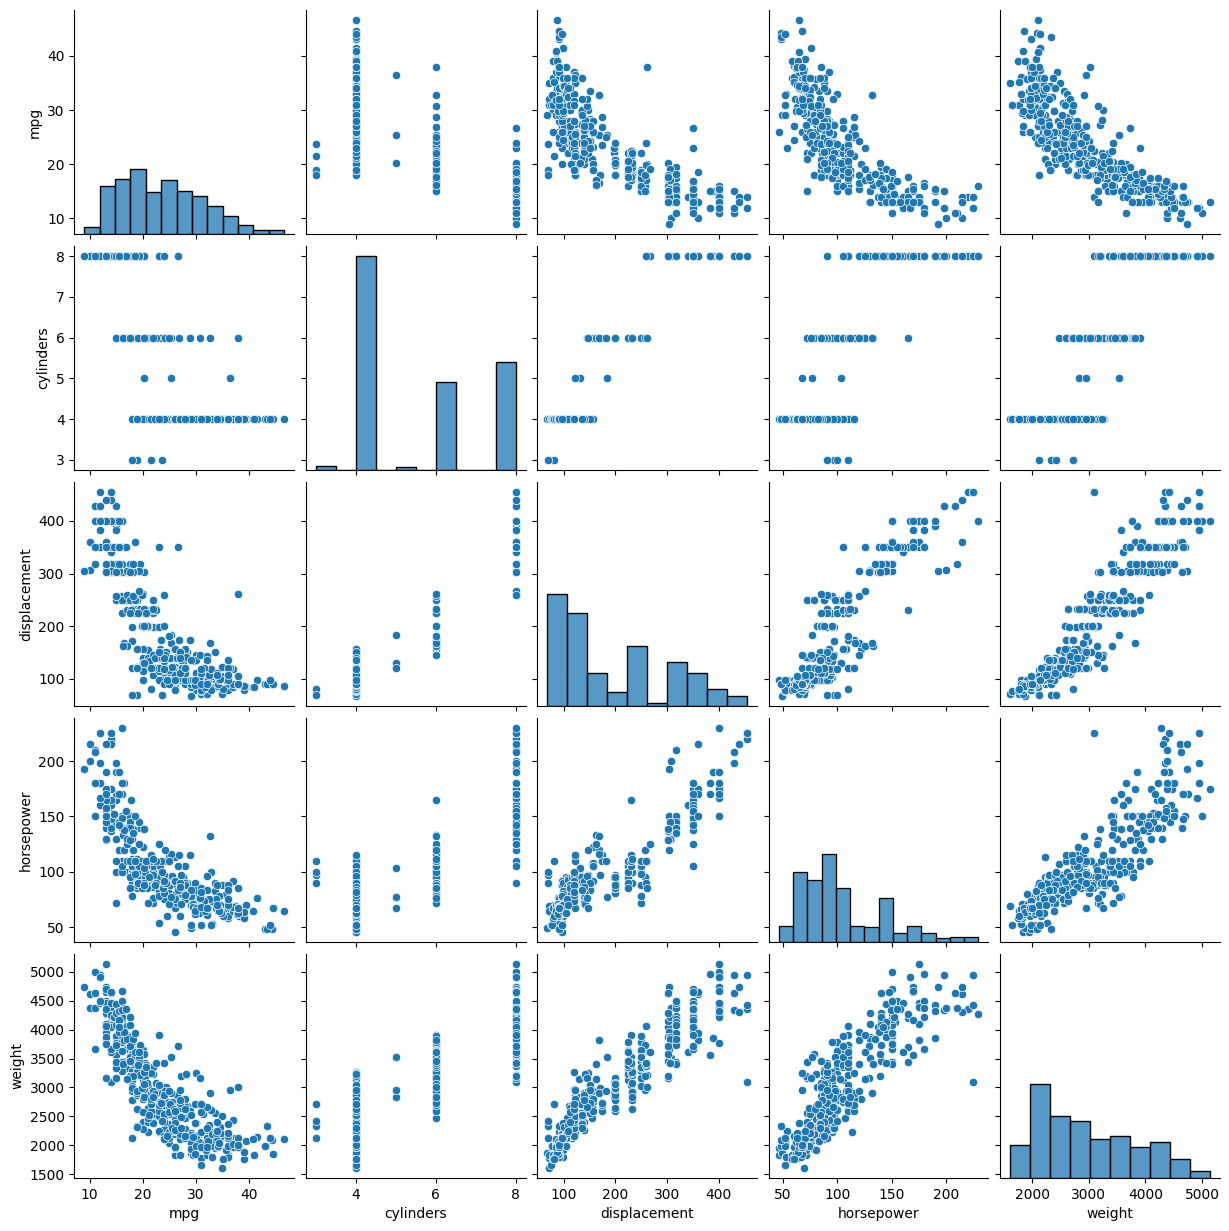

In [215]:
sns.pairplot(X)

In [216]:
# let's make ONE scatter for one of the above scatterplots:
x_dp = X['displacement']
print(type(x_dp), x_dp.shape) # <class 'pandas.core.series.Series'> (398,)
print(x_dp[:5])

<class 'pandas.core.series.Series'> (398,)
0    307.0
1    350.0
2    318.0
3    304.0
4    302.0
Name: displacement, dtype: float64


In [217]:
y_hp = X['horsepower']
print(type(y_hp), y_hp.shape) # <class 'pandas.core.series.Series'> (398,)
print(y_hp[:5])

<class 'pandas.core.series.Series'> (398,)
0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64


In [218]:
# check for missing data
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 18.4 KB


In [219]:
# redo clean x and y cols for scatter and regression line
x_dp_clean = X_clean["displacement"]
y_hp_clean = X_clean["horsepower"]

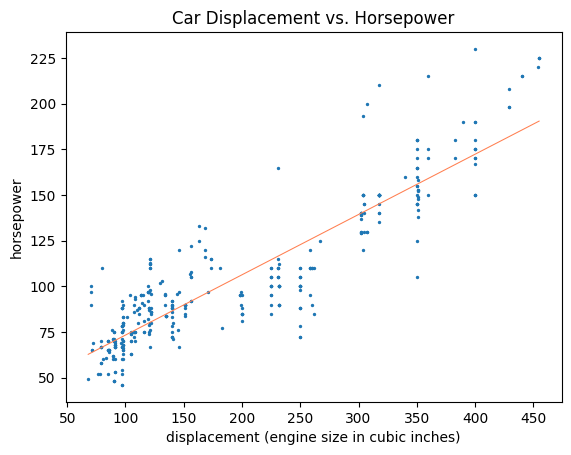

In [220]:
# now that we have 398 of each x and y, we can scatterplot as 398 dots
plt.scatter(x_dp_clean,y_hp_clean,s=2)
plt.title("Car Displacement vs. Horsepower")
plt.xlabel("displacement (engine size in cubic inches)")
plt.ylabel("horsepower")
# plot regression line through the dots;
# get m and b for y=mx+b slope of line formula
m, b = np.polyfit(x_dp_clean,y_hp_clean,1)
# sort the x_hp series so that the x-axis keeps moving from left to right
x_dp_clean_sorted = np.sort(x_dp_clean)
# plot the line, with y in terms of x
plt.plot(x_dp_clean_sorted, m * x_dp_clean_sorted + b, color='coral', lw=.75)
plt.show()

In [221]:
# make y (target vector of "answers") by popping "mpg"
y = X_clean.pop("mpg")

In [222]:
print(y.shape) # (392,)
print(y[:5])

(392,)
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


In [223]:
# check how many of each cylinder value we have
print(X_clean["cylinders"].value_counts())

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64


**training a linear regression machine learning model**

Using our **car data**, we will train a model to
- **predict mpg** based on 4 **independent variables**.  

these independent variables will be "fed" as X to the model along with the corresponding mpg (y)
  - **horsepower**
  - **displacement**
  - **weight**
  - **cylinders**
- Save those 4 columns to a new df, called **X**
- **X** is a 2D matrix, a **DataFrame**
- Clean X by removing rows with missing values (that's 6 horsepower rows)
- Save just **mpg** -- the value we want to predict -- as **y**
- **y** is a vector of "answers" / labels; **y** is **dependent variable**
- since **y** comes from just one column, it is a **1D** vector (**Series**)
- once X and y are ready, split them into **X_train, X_test, y_train, y_test**
- training sets are 80% of all rows by default
- **X_train, y_train** are "fed" to the model during training: question w answer

Supervised Machine Learning involves training an ML Model to recognize patterns in data in such a way that it can make predictions when it sees new data. The training process involves providing the model with inputs and correct answers. After seeing enough correct input-answer sets, the model may be able to then predict with some degree of reliability a future answer from just the inputs.

- **features** are the inputs to the model (**X**). Each **X** could consist of just one variable, or it could contain several (or many).

- **target** is the "answer" the model is trained on and will be trying to predict (**y**)  

- **X_train** is the conventional name given to the set of features set aside for training the model, this is typically 80% of the data  

- **y_train** is the conventional name given to the set of targets / "answers" set aside for training the model, this is typically 80% of the data

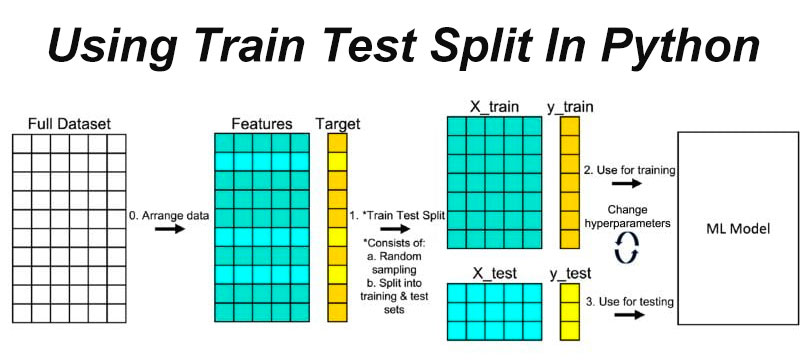

In [224]:
# output the train-test-split jpg
Image(base_path + "images/train-test-split.jpg")

- **train_test_split(X,y,test_size)** method takes 3 inputs: X, y and test_size
- **test_size** is the percent of data that you want to hold in reserve for later testing.
- the model will not see testing data during training;
- the test_size is typically 20%, so .2
- **train_test_split()** method returns 4 arrays of data:
  - **X_train**, a dataframe of X input features for *training* the model; consists of 80% of the data
  - **X_test**, a dataframe the X input features for *testing* the model, consists of 20% of the data
  - **y_train**, a vector of y input labels for training; consists of 80% of the data
  - **y_test**, a vector of y input labels for testing; consists of 20% of the data

In [225]:
# Pass X (features) and y (labels / "correct answers") to the train_test_split method.
# The method returns 4 arrays, so set the call equal to 4 variables, separated by commas
X_train, X_test, y_train, y_test = train_test_split(X_clean,y,test_size=0.2)
# The order does matter. The method returns:
# X_train as a dataframe,
# X_test as a dataframe
# y_train as a vector
# y_test as a vector
# Add a third argument test_size to specify the percent of data to be used for testing

In [226]:
# Output the X_train dataframe
# this is the data the model will be trained on
# it will be shown these inputs and asked to predict mpg
# The "mpg" -- is not here, as that is the y data
print(X_train.shape) # (313, 4) the df of 80% of rows, 4 cols only, data shuffled
print(type(X_train)) # <class 'pandas.core.frame.DataFrame'>
X_train.head()
# L@@K: the rows are not in order because random 80% was selected for training

(313, 4)
<class 'pandas.core.frame.DataFrame'>


,cylinders,displacement,horsepower,weight
170,4,140.0,78.0,2592
196,4,98.0,60.0,2164
36,6,250.0,88.0,3302
323,4,156.0,105.0,2800
350,4,105.0,63.0,2215


In [227]:
# Output the y_train vector
# this data consists of the labels ("correct answers"), provided during training
# the model will be shown these labels so that it can learn how they relate to the inputs
# the model will figure out a relationship between X and y, and with that can predict prices
print(y_train.shape) # (313,) the vector of 80% of "answers" / labels shuffled in sync with X
print(y_train[:5])

(313,)
170    23.0
196    24.5
36     19.0
323    27.9
350    34.7
Name: mpg, dtype: float64


In [228]:
# output the first 5 X_test rows from the dataframe
# these are the inputs / features to be used for testing the model
# testing involves having the model predict prices to go with
# the X_test inputs
# accuracy is a measure of how closely the model predicts
# the actual prices of the test set
print(X_test.shape) # (79, 4)
X_test.head()

(79, 4)


,cylinders,displacement,horsepower,weight
318,4,134.0,90.0,2711
164,6,231.0,110.0,3039
179,4,121.0,98.0,2945
173,4,119.0,97.0,2545
240,4,97.0,78.0,2190


In [229]:
# output the first 5 y_test values from the 1D vector
# these are "correct labels" that correspond to the X_test inputs
print(y_test.shape) # (79,)
print(y_test[:5])

(79,)
318    29.8
164    21.0
179    22.0
173    24.0
240    30.5
Name: mpg, dtype: float64


- **standard_scaler.fit_transform(X_train)** standardizes the input numbers
  - the mean of each column becomes 0
  - the other values are all standard deviations

In [230]:
# instantiate the StandardScaler
scaler = StandardScaler()
# specify that scaler ignores 'cylinders' column
cols_to_scale = ['displacement', 'horsepower', 'weight']
scaler.fit(X_train[cols_to_scale])

StandardScaler()

In [231]:
# make a standard scaler version of X_train
# start by making independent copies of X_train and X_test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [232]:
# scaler.transform(X_train[['displacement', 'horsepower', 'weight']])
# so in addition to setting the mean to 0
# and all other values to standard deviations from the mean
# fit_transform also strips the DataFrame down to a 2D numpy array
X_train_scaled[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
# fit_transform also strips the DataFrame down to a 2D numpy array
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [233]:
# get the min max of hp col
print('min hp:', X_train['horsepower'].min())
print('max hp:', X_train['horsepower'].max())
print('mean hp:', round(X_train['horsepower'].mean()))
print('min dp:', X_train['displacement'].min())
print('max dp:', X_train['displacement'].max())
print('mean dp:', round(X_train['displacement'].mean()))

min hp: 46.0
max hp: 230.0
mean hp: 107
min dp: 68.0
max dp: 455.0
mean dp: 199


In [234]:
print(X_train_scaled.shape) # (313, 4)
X_train_scaled.head()

(313, 4)


,cylinders,displacement,horsepower,weight
170,4,-0.558733,-0.732174,-0.503734
196,4,-0.954493,-1.193076,-1.004581
36,6,0.477781,-0.476118,0.327111
323,4,-0.407967,-0.040822,-0.260331
350,4,-0.888533,-1.116259,-0.944900


In [235]:
print(X_test_scaled.shape) # (79, 4)
X_test_scaled.head()

(79, 4)


,cylinders,displacement,horsepower,weight
318,4,-0.615270,-0.424906,-0.364479
164,6,0.298747,0.087206,0.019348
179,4,-0.737767,-0.220061,-0.090652
173,4,-0.756613,-0.245667,-0.558733
240,4,-0.963916,-0.732174,-0.974156


**classification** refers to assigning a label or value to some data
- classification comprises two categories of values: **discrete** and **continuous** classes
- **discrete** classification refers to a small number of possible classes, which can be numeric or strings, such as:
  - 4, 6 or 8 cylinders of a car
  - mammal, reptile, fish, bird or amphibian
  - 'sold' or 'unsold'
  - 'fuel efficient', 'acceptable mpg', 'gas guzzler'
- **continuous** classification refers to a range of numeric values, such as:
  - prices
  - distances
  - weights
  - mpg
  - horsepower
  
- **LinearRegression** involves predicting *continuous* values

- **sklearn LinearRegression** method returns a model that is trained to make predictions of continuous values
- linear regression prediction involves plotting on a regression line, which is the "best fit"  
line through a set of x-y data points, as a scatter plot
- given input X, the model finds y using slope of a line equation: **y = mx + b**

In [236]:
# instantiate a LinearRegression model
lingres_model = LinearRegression()

### **training the model**.
**model.fit()**
- the linear regression model has a **fit()** method
- **model.fit()** takes the training data, **X_train**, **y_train**, as its inputs
- **model.fit()** returns a *trained model*
- the trained model can receive an input, X, and predict its y value (the answer)
- the y-value is the prediction
- keep in mind that "X" is not a single value, as in an ordinay plot, but rather a fusion of 4 variables in the feature set

In [237]:
# train the model
lingres_model.fit(X_train_scaled, y_train)

LinearRegression()

#### **testing the model: having the model predict y from X alone**
- **y_pred = model.predict(X_test)** takes the test variables and returns as many answers / predicting

In [238]:
# call the predict method on the model and pass it the testing data matrix:
y_pred = lingres_model.predict(X_test_scaled)

In [244]:
# print predictions along w actual values:
print('model predictions vs actual mpg:')
print('y_test', list(y_test[:30]))
print('y_pred', list(y_pred[:30]))

model predictions vs actual mpg:
y_test [29.8, 21.0, 22.0, 24.0, 30.5, 34.4, 27.0, 18.0, 15.0, 31.5, 23.0, 13.0, 22.0, 28.0, 37.0, 34.3, 17.5, 33.5, 16.0, 32.0, 18.0, 32.8, 37.3, 43.1, 20.0, 25.8, 19.1, 28.0, 14.0, 21.0]
y_pred [np.float64(26.167056592386313), np.float64(22.914763229090052), np.float64(24.359437045965365), np.float64(26.522035388078017), np.float64(29.269723196845256), np.float64(30.775107215662423), np.float64(28.96295864667492), np.float64(22.032103808072364), np.float64(14.307297125811282), np.float64(30.60755458976385), np.float64(24.170723173817215), np.float64(10.881566853892203), np.float64(24.547886775285107), np.float64(29.71915381631315), np.float64(30.65038523029014), np.float64(29.28034752364717), np.float64(20.531732622139216), np.float64(30.909302871059445), np.float64(22.37578491816588), np.float64(31.640757803275626), np.float64(23.641270752583495), np.float64(31.638719462919802), np.float64(30.036757197890207), np.float64(31.97083032553419), np.float64

### **the model's accuracy score: comparing predictions to actual y values**
**model.score(X_test_scaled, y_test)** method test
- **model.score()** method takes the testing data as **X_test_scaled** and **y_test** as its inputs
- **fit()** method returns a trained model which can take an input and provide the output by plotting it to the regression line
- the result would be 100% accuracy if X were just one variable, but since it is 3, plotting the regression point is less straightforward and the model is subject to error.

That 0.676... is not “70% of mpg values were right” and not “within 70% of the correct answers.”

In sklearn, for LinearRegression,

lingres_model.score(X_test_scaled, y_test)


returns R² (coefficient of determination), not an “accuracy” in the classification sense.

1. What .score() really is for LinearRegression

Under the hood, this is basically doing:

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)


where y_pred = lingres_model.predict(X_test_scaled).

The formula for R² is:
The formula for R² is:

\[
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
           {\sum_{i=1}^{n} (y_i - \bar{y})^2}
\]

where

- \(y_i\) = actual value  
- \(\hat{y}_i\) = predicted value  
- \(\bar{y}\) = mean of the actual values  
- \(n\) = number of observations

So:

R² = how much better your model is than “just predict the mean every time,” in terms of explaining variance.

R² = 1.0 → perfect: predictions exactly match actuals

R² = 0.0 → no better than just predicting the mean

R² < 0 → worse than just predicting the mean (yikes)

R² = 0.676 → your model explains about 67.6% of the variance in mpg relative to that mean-only baseline

That’s all it means.

2. Why you can have a “good” R² even if nothing is exactly right

Regression almost never hits the exact number. What matters is that your predictions are close and move in the right direction when the features change.

Tiny toy example:

Actual mpg:    [20, 25, 30, 35]
Predicted mpg: [21, 26, 29, 34]


No prediction is exactly equal to the actual mpg.

But all predictions are very close and follow the same pattern (up when actual goes up).

R² here would be very high (close to 1) because the model captures almost all the variation, even though it’s “wrong” every time.

So “nothing exactly right” is normal — the R² score cares about overall fit, not perfect matches.

In [239]:
accuracy_score = lingres_model.score(X_test_scaled,y_test)
print(accuracy_score)
# 0.676333634238613
# the model should be around 70% accurate on
# predicting mpg. this does not mean that it
# predicted 70% of the mpg exactly right


0.6968145817369855


In [246]:
# make a new col for mpg categories (fuel efficient, acceptable mpg, gas guzzler)
X_new = X.copy()
print(X_new.shape)
X_new.head()

(398, 5)


,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449


In [248]:
# declare a new column, 'mpg category'
# col has 3 values: fuel efficient, acceptable, gas guzzler
# categories assigned as follows:
# 0-18 = gas guzzler
# 18-26 = acceptable
# 27+ = fuel efficient
X_new["mpg category"] = "gas guzzler"

In [250]:
print(X_new.shape) # (398, 6)
X_new.head(3)

(398, 6)


,mpg,cylinders,displacement,horsepower,weight,mpg category
0,18.0,8,307.0,130.0,3504,gas guzzler
1,15.0,8,350.0,165.0,3693,gas guzzler
2,18.0,8,318.0,150.0,3436,gas guzzler


In [267]:
# now redo it the correct way BUT it's kinda complicated
# we have to run a functoin iteratively on every mpg value, row by row
# the function, called a lambda will take the mpg value as its input arg
# and will run if else logic on it and assign the correct category
# the category string will be the output of the function
# df['col'].apply() loops the col, row by row
# df['col'].apply(lambda input : output)
# apply takes a lambda function which it runs on each indivual item, row by row
X_new["mpg category"] = X_new["mpg"].apply(lambda m : 'gas guzzler' if m<=18 else 'acceptable' if m<=26 else 'fuel efficient')

In [268]:
print(X_new.shape) # (398, 6)
X_new.sample(5)

(398, 6)


,mpg,cylinders,displacement,horsepower,weight,mpg category
185,26.0,4,98.0,79.0,2255,acceptable
114,26.0,4,98.0,90.0,2265,acceptable
310,38.1,4,89.0,60.0,1968,fuel efficient
184,25.0,4,140.0,92.0,2572,acceptable
93,14.0,8,318.0,150.0,4237,gas guzzler


In [269]:
# how many of each?
print(X_new['mpg category'].value_counts())

mpg category
fuel efficient    138
acceptable        136
gas guzzler       124
Name: count, dtype: int64


In [274]:
# one-hot encoding for categorical values
# ML models cannot handle string input
# categories must be converted to nums
# BUT categories cannot imply ranking
# new_df = pd.get_dummies(df['col'])
# new_df has one col for each unique value in df['col']
mpg_dummies = pd.get_dummies(X_new['mpg category'],dtype=int)

In [277]:
print(mpg_dummies.shape)
mpg_dummies.sample(10)

(398, 3)


,acceptable,fuel efficient,gas guzzler
2,0,0,1
273,1,0,0
59,1,0,0
359,0,1,0
303,0,1,0
387,0,1,0
334,1,0,0
154,0,0,1
190,0,0,1
311,0,1,0


In [279]:
# concat the dummies 3-col df onto X_new,
# axis=1 concats vertically (3 more cols) which is what we want
# axis=0 concats horiz (398 more rows)
X_new = pd.concat([X_new, mpg_dummies], axis=1)

In [281]:
print(X_new.shape) # (398, 9)
X_new.sample(3)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,mpg category,acceptable,fuel efficient,gas guzzler
66,17.0,8,304.0,150.0,3672,gas guzzler,0,0,1
267,27.5,4,134.0,95.0,2560,fuel efficient,0,1,0
242,21.5,4,121.0,110.0,2600,acceptable,1,0,0


In [ ]:
X_new.info() # missing 6 horsepower rows; get rid of them

In [283]:
X_new_clean = X_new.dropna(subset=["horsepower"])

In [284]:
print(X_new_clean.shape) # (392, 9)
X_new_clean.sample(3)

(392, 9)


,mpg,cylinders,displacement,horsepower,weight,mpg category,acceptable,fuel efficient,gas guzzler
391,36.0,4,135.0,84.0,2370,fuel efficient,0,1,0
292,18.5,8,360.0,150.0,3940,acceptable,1,0,0
61,21.0,4,122.0,86.0,2226,acceptable,1,0,0


In [285]:
# make y_new from the mpg category col:
y_new = X_new_clean.pop('mpg category')

In [296]:
print(y_new[::50], len(y_new))
print(X_new_clean.shape) # (392, 8)
X_new_clean.sample(3)

0         gas guzzler
51     fuel efficient
101        acceptable
152        acceptable
202       gas guzzler
252        acceptable
302    fuel efficient
355    fuel efficient
Name: mpg category, dtype: object 392
(392, 8)


,mpg,cylinders,displacement,horsepower,weight,acceptable,fuel efficient,gas guzzler
5,15.0,8,429.0,198.0,4341,0,0,1
337,32.4,4,107.0,72.0,2290,0,1,0
376,37.0,4,91.0,68.0,2025,0,1,0


In [290]:
feature_cols = ['cylinders','displacement','horsepower','weight']

In [302]:
X_clean_4_col = X_new_clean[feature_cols]

In [303]:
print(X_new_clean.shape) # (392, 4)
X_new_clean.sample(3)

(392, 8)


,mpg,cylinders,displacement,horsepower,weight,acceptable,fuel efficient,gas guzzler
86,14.0,8,304.0,150.0,3672,0,0,1
202,17.5,6,258.0,95.0,3193,0,0,1
133,16.0,6,250.0,100.0,3781,0,0,1


In [300]:
from sklearn.linear_model import LogisticRegression

In [308]:
# split the X and y_new
# stratify=y means balance the values between testing and training
X_train, X_test, y_train, y_test = train_test_split(X_clean_4_col,y_new,test_size=0.2, random_state=42, stratify=y_new)

In [312]:
print(y_train[:3], y_train.shape) # (313,)
print(X_train.shape) # (313, 4)
X_train.head(3)

203    fuel efficient
40        gas guzzler
149        acceptable
Name: mpg category, dtype: object (313,)
(313, 4)


,cylinders,displacement,horsepower,weight
203,4,97.0,71.0,1825
40,8,351.0,153.0,4154
149,4,120.0,97.0,2489


In [329]:
print(y_test[:3], y_test.shape) # (79,)
print(X_test.shape) # (79, 4)
X_test.head(3)

8         gas guzzler
316        acceptable
324    fuel efficient
Name: mpg category, dtype: object (79,)
(79, 4)


,cylinders,displacement,horsepower,weight
8,8,455.0,225.0,4425
316,6,225.0,90.0,3381
324,4,85.0,65.0,2110


In [314]:
# scaler the X_train, X_test cols BUT not cylinders
sc = StandardScaler()

In [315]:
scale_cols = ['displacement','horsepower','weight']

In [316]:
# fitting the scaler with the 3 cols to scale (so it knows to ignore cylinders)
sc.fit(X_train[scale_cols])

StandardScaler()

In [318]:
# copy X_train and X_test; the copy is what gets scaled
X_train_sc = X_train.copy()
X_test_sc = X_test.copy()

In [319]:
# scale the 3 cols in each df:
X_train_sc[scale_cols] = sc.transform(X_train[scale_cols])
X_test_sc[scale_cols] = sc.transform(X_test[scale_cols])

In [320]:
print(X_train_sc.shape) # (79, 8)
X_train_sc.head(3)

(313, 4)


,cylinders,displacement,horsepower,weight
203,4,-0.945445,-0.877695,-1.365192
40,8,1.515705,1.334296,1.378361
149,4,-0.722585,-0.176332,-0.583003


In [321]:
print(X_test_sc.shape) # (79, 8)
X_test_sc.head(3)

(79, 4)


,cylinders,displacement,horsepower,weight
8,8,2.523420,3.276531,1.697597
316,6,0.294820,-0.365160,0.467770
324,4,-1.061719,-1.039548,-1.029463


In [324]:
# instantiate the model;
# we use LogisticRegression cuz we are predicting a category
# NOT a continuous value (e.g. price, hp, mpg, deg_fahr)
logres_model = LogisticRegression(max_iter=1000)

In [325]:
# train the model by "feedint" it the training features (questions) and the targets (answers) -- be sure to give it the scaled version of the data
logres_model.fit(X_train_sc,y_train)

LogisticRegression(max_iter=1000)

In [327]:
# test the model on the testing data -- model does NOT get the answers here:
y_pred = logres_model.predict(X_test_sc)

In [328]:
# import more for metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [330]:
# how well did the model do? Compare its y_pred to the actual answers y_test
training_accuracy = logres_model.score(X_train_sc,y_train)

In [331]:
print("Training accuracy:", training_accuracy)

Training accuracy: 0.7380191693290735


In [334]:
# testing accuracy compares actual answers (y_test) to model's predictions (y_pred)
testing_accuracy = accuracy_score(y_test,y_pred)
print("Testing accuracy:", testing_accuracy)

Testing accuracy: 0.810126582278481


In [335]:
# made confusion matrix showing true-false pos-neg
# because there are different ways to be right or wrong
labels = ['gas guzzler', 'acceptable', 'fuel efficient']
conf_mtrx = confusion_matrix(y_test, y_pred, labels=labels)

In [336]:
print(type(conf_mtrx), conf_mtrx.shape)

<class 'numpy.ndarray'> (3, 3)


In [347]:
cm_df = pd.DataFrame(conf_mtrx, index=labels, columns=labels)

In [348]:
print(len(y_test))
print(y_test.value_counts())

79
mpg category
acceptable        27
fuel efficient    27
gas guzzler       25
Name: count, dtype: int64


In [349]:
print(cm_df.shape)
cm_df

(3, 3)


,gas guzzler,acceptable,fuel efficient
gas guzzler,21,4,0
acceptable,1,19,7
fuel efficient,0,3,24


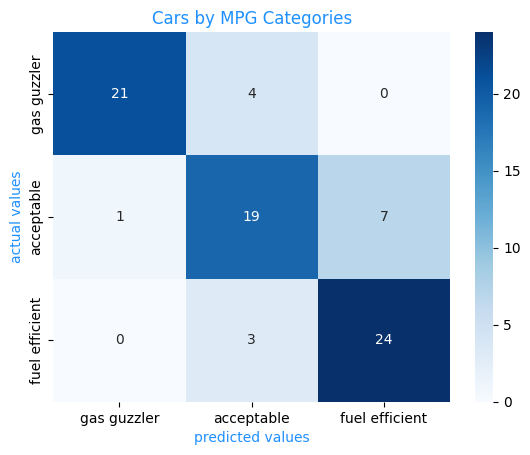

In [369]:
# visualize the confusion matrix as a heatmap
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title("Cars by MPG Categories", color="dodgerblue")
plt.ylabel('actual values', color="dodgerblue")
plt.xlabel('predicted values', color="dodgerblue")
plt.savefig(base_path + 'images/heatmap-mpg-cats.png')
plt.show()

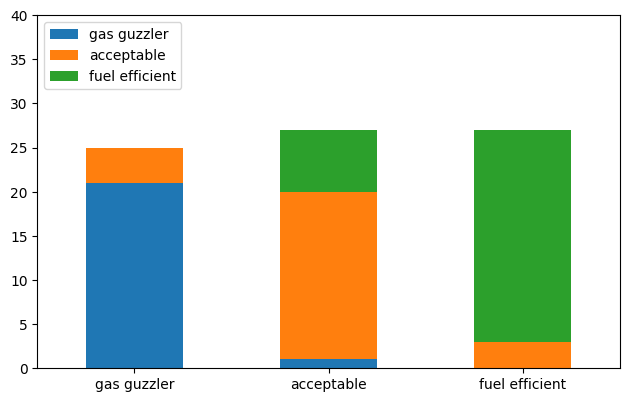

In [368]:
# make a bar chart -- stacked
ax = cm_df.plot(kind="bar", stacked=True)
ax.legend(loc="upper left")
plt.tight_layout()
ax.set_ylim(0,40)
plt.xticks(rotation=0)
# save the heatmap and stacked bar chart
plt.savefig(base_path + 'images/stacked-bars-mpg-cats.png')
plt.show()